<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#ЦПТ-для-различных-распределений" data-toc-modified-id="ЦПТ-для-различных-распределений-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>ЦПТ для различных распределений</a></span><ul class="toc-item"><li><span><a href="#Сгенерируйте-примеры-из-распределения" data-toc-modified-id="Сгенерируйте-примеры-из-распределения-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Сгенерируйте примеры из распределения</a></span></li><li><span><a href="#Постройте-гистограмму-выборки-и-теоретическую-плотность-распределения" data-toc-modified-id="Постройте-гистограмму-выборки-и-теоретическую-плотность-распределения-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Постройте гистограмму выборки и теоретическую плотность распределения</a></span></li><li><span><a href="#Оценим-распределение-выборочного-среднего-для-разных-объёмов-выборок" data-toc-modified-id="Оценим-распределение-выборочного-среднего-для-разных-объёмов-выборок-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Оценим распределение выборочного среднего для разных объёмов выборок</a></span></li></ul></li><li><span><a href="#Доверительный-интервал-на-основе-ЦПТ" data-toc-modified-id="Доверительный-интервал-на-основе-ЦПТ-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Доверительный интервал на основе ЦПТ</a></span></li></ul></div>

Homework4 Школа DataScientist, декабрь 2022, Андреева Ольга

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
import math
%matplotlib inline

## ЦПТ для различных распределений
Возьмите то непрерывное распределение, которое вам больше всего понравится из списка доступных в модуле [scipy.stats](https://docs.scipy.org/doc/scipy/reference/stats.html).

### Сгенерируйте примеры из распределения

In [131]:
my_rv =  sts.expon() #sts.norm()#
sample = my_rv.rvs(10000)
sample

array([0.18687088, 1.6590032 , 1.12379361, ..., 1.96580539, 0.12542046,
       1.33226187])

In [132]:
sample.dtype

dtype('float64')

In [133]:
v_real_mean = my_rv.mean() # настоящее среднее случайной величины

In [134]:
v_real_var = my_rv.var() # настоящая дисперсия случайной величины

In [135]:
print (real_mean, real_var)

1.0 1.0


### Постройте гистограмму выборки и теоретическую плотность распределения

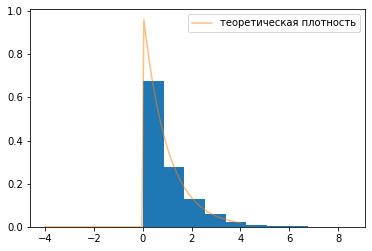

In [136]:
# ваш код тут
plt.hist(sample, density=True)
x = np.linspace(-4,4,100)
pdf = my_rv.pdf(x)
plt.plot(x, pdf, label='теоретическая плотность', alpha=0.5)
plt.legend()

In [137]:
sample_mean = sample.mean() # выборочное среднее
print(sample_mean)
sample_var = sample.var() # выборочная дисперсия
print(sample_var)

1.0143021572717819
1.0589914752881524


### Оценим распределение выборочного среднего для разных объёмов выборок
Для этого постройте на одном полотне гистограмму выборочных средних и теоретическое распределение выборочных средних по ЦПТ для разных объёмов выборок.

Для теоретического распределение используйте настоящие значения мат ожидания и дисперсии (не приближенные на основе выборки).

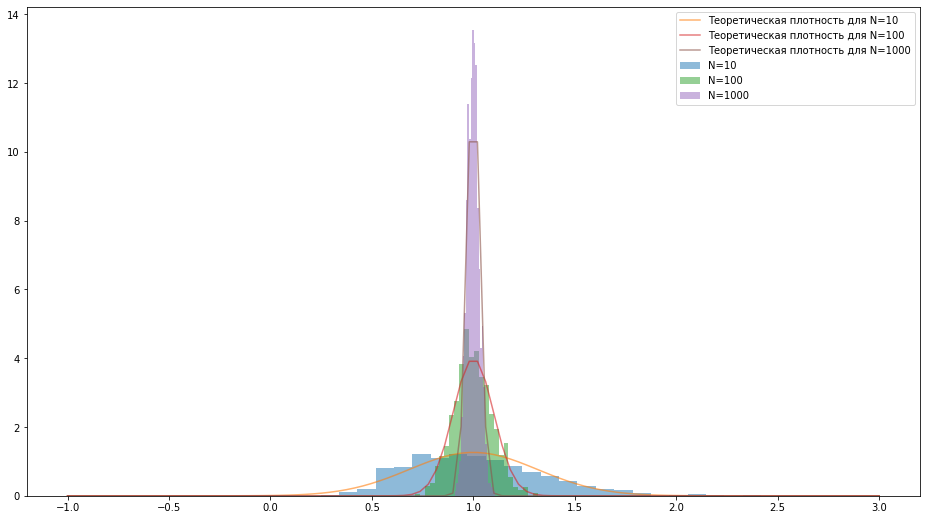

In [179]:
# сгенерируем выборочные средние

с_smpl_sizes=[10, 100,1000]         #размеры выборок
c_num_of_smpls=1000

#определяю границы, в которых будут отображаться графики
c_num_of_sigma=2
c_left_limit=v_real_mean-c_num_of_sigma*np.sqrt(v_real_var)
c_right_limit=v_real_mean+c_num_of_sigma*np.sqrt(v_real_var)

plt.figure(figsize=(16,9))

for v_smpl_size in с_smpl_sizes:
    v_means = []
    for i in range(c_num_of_smpls):
        v_smpl=my_rv.rvs(v_smpl_size)
        v_means.append(np.mean(v_smpl))
    plt.hist(v_means, density=True, bins='auto',  alpha=0.5 , label= 'N='+str(v_smpl_size))

    norm_rv = sts.norm(loc=v_real_mean, scale=v_real_var/np.sqrt(v_smpl_size))
    x = np.linspace(c_left_limit,c_right_limit, 100)
    pdf = norm_rv.pdf(x)
    plt.plot(x, pdf, label='Теоретическая плотность для N='+str(v_smpl_size), alpha=0.6)    


plt.legend()
plt.show()

Вывод: для экспоненциального распределения апроксимация распределения выборочного среднего работает хорошо

## Доверительный интервал на основе ЦПТ
Возьмите данные для оттока телеком компании, и постройте доверительные интервалы для среднего значения total day calls, используя центральную предельную теорему в разбиении по колонке churn (ушел/не ушел). 

Для оценки дисперсии используйте несмещенную оценку (параметр ddof=1).

Сделайте оценку с использованием явной формулы для z интервала, а затем с помощью функций 
`from statsmodels.stats.weightstats import _zconfint_generic`. Сравните результаты.


Ссылка на данные: https://drive.google.com/file/d/1X_drKqoarnU2Sz2har7uSCsgyhh8Xtz8/view?usp=sharing

In [2]:
# либо загружаем из альтернативного хранилища
url ="https://raw.githubusercontent.com/piton1/DS/Lesson_5/telecom_churn.csv"
df=pd.read_csv(url)
display(df)

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,AZ,192,415,414-4276,no,yes,36,156.2,77,26.55,...,126,18.32,279.1,83,12.56,9.9,6,2.67,2,False
3329,WV,68,415,370-3271,no,no,0,231.1,57,39.29,...,55,13.04,191.3,123,8.61,9.6,4,2.59,3,False
3330,RI,28,510,328-8230,no,no,0,180.8,109,30.74,...,58,24.55,191.9,91,8.64,14.1,6,3.81,2,False
3331,CT,184,510,364-6381,yes,no,0,213.8,105,36.35,...,84,13.57,139.2,137,6.26,5.0,10,1.35,2,False
